In [11]:
import glob,re
import numpy as np
import matplotlib as mpl
import mplhep
import matplotlib.pyplot as plt
plt.style.use(mplhep.style.CMS)
import ROOT
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 16,
     'axes.labelsize': 20,
     'axes.labelpad': 15,
     'xtick.labelsize': 16,
     'ytick.labelsize': 16
    }
    )

In [12]:
norm_to_1fb = True

# datasets = [ "2017", "2018", "2017_2018" ]
datasets = [ "2018" ]

save_figures = False

In [14]:
glob_prefix_dataset = {}
if not norm_to_1fb:
    glob_prefix_dataset[ "2017" ] = "higgsCombine2017_AQGC_"
    glob_prefix_dataset[ "2018" ] = "higgsCombine2018_AQGC_"
    glob_prefix_dataset[ "2017_2018" ] = "higgsCombine2017_2018_AQGC_"
    base_path = "output"
#     base_path = "output-final"
    
else:
#     glob_prefix_dataset[ "2017" ] = "higgsCombine2017_AQGC_norm_to_1fb_"
#     glob_prefix_dataset[ "2018" ] = "higgsCombine2018_AQGC_norm_to_1fb_"
#     glob_prefix_dataset[ "2017_2018" ] = "higgsCombine2017_2018_AQGC_norm_to_1fb_"
    glob_prefix_dataset[ "2017" ] = "higgsCombine2017_AQGC_"
    glob_prefix_dataset[ "2018" ] = "higgsCombine2018_AQGC_"
    glob_prefix_dataset[ "2017_2018" ] = "higgsCombine2017_2018_AQGC_"
    base_path = "output_norm_to_1fb"

#base_path = "output"
quantiles = [ 0.500, 0.840, 0.160, 0.975, 0.025 ]
p_label = re.compile( "higgsCombine(.*).HybridNew.mH120.123456.quant(.*).root" )
# p_label = re.compile( "higgsCombine(.*).HybridNew.mH120.quant(.*).root" )
p_coupling = re.compile( "A0W(.*)" )

def fetch_limits( dataset ):
    limits_ = {}
    map_couplings_ = {}
    for q_ in quantiles:
        str_q_ = "{:.3f}".format( q_ )
        file_paths_ = glob.glob( "{}/{}*quant{}.root".format( base_path, glob_prefix_dataset[ dataset ], str_q_ ) )
        if not norm_to_1fb:
            file_paths_ = [ file__ for file__ in file_paths_ if file__.find( "norm_to_1fb" ) == -1 ]
        print ( file_paths_ )
        limits_[ q_ ] = {}
        for file_path__ in file_paths_:
            label__ = p_label.search( file_path__ ).group(1)
            coupling__ = float( p_coupling.search( label__ ).group(1) )
            if not hasattr( map_couplings_, label__ ): map_couplings_[ label__ ] = coupling__
            print ( file_path__ )
            print ( str_q_, coupling__, label__ )
            root_file__ = ROOT.TFile.Open( file_path__, "READ" )
            root_tree__ = root_file__.Get( "limit" )
            root_tree__.GetEntry(1)
            limit__ = root_tree__.limit
            limit_err__ = root_tree__.limitErr
            limits_[ q_ ][ label__ ] = ( limit__, limit_err__ )
            print ( limits_[ q_ ][ label__ ] )
    print ( limits_ )
    print ( map_couplings_ )
    
    return ( limits_, map_couplings_ )

# limits_2017, map_couplings_2017 = fetch_limits( dataset="2017" )
# limits_2018, map_couplings_2018 = fetch_limits( dataset="2018" )
# limits_2017_2018, map_couplings_2017_2018 = fetch_limits( dataset="2017_2018" )
limits = {}
map_couplings = {}
for dataset_ in datasets:
    limits[ dataset_ ], map_couplings[ dataset_ ] = fetch_limits( dataset=dataset_ )

['output_norm_to_1fb/higgsCombine2018_AQGC_A0W1e-6.HybridNew.mH120.123456.quant0.500.root', 'output_norm_to_1fb/higgsCombine2018_AQGC_A0W2e-6.HybridNew.mH120.123456.quant0.500.root', 'output_norm_to_1fb/higgsCombine2018_AQGC_A0W5e-6.HybridNew.mH120.123456.quant0.500.root']
output_norm_to_1fb/higgsCombine2018_AQGC_A0W1e-6.HybridNew.mH120.123456.quant0.500.root
0.500 1e-06 2018_AQGC_A0W1e-6
(22.29463988943264, 0.26562928371176153)
output_norm_to_1fb/higgsCombine2018_AQGC_A0W2e-6.HybridNew.mH120.123456.quant0.500.root
0.500 2e-06 2018_AQGC_A0W2e-6
(7.906689546426087, 0.083981867731559)
output_norm_to_1fb/higgsCombine2018_AQGC_A0W5e-6.HybridNew.mH120.123456.quant0.500.root
0.500 5e-06 2018_AQGC_A0W5e-6
(3.3322983446707304, 0.042852859136010925)
['output_norm_to_1fb/higgsCombine2018_AQGC_A0W1e-6.HybridNew.mH120.123456.quant0.840.root', 'output_norm_to_1fb/higgsCombine2018_AQGC_A0W2e-6.HybridNew.mH120.123456.quant0.840.root', 'output_norm_to_1fb/higgsCombine2018_AQGC_A0W5e-6.HybridNew.mH120.

Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthori

In [4]:
# from scipy.optimize import curve_fit

# def exp(x, p0, p1):
#    return p0 * np.exp( p1 * x )

colors_quantile = {}
colors_quantile[ 0.500 ] = "gray"
colors_quantile[ 0.840 ] = "yellow"
colors_quantile[ 0.160 ] = "yellow"
colors_quantile[ 0.975 ] = "green"
colors_quantile[ 0.025 ] = "green"

def plot_limits_quantile( limits, quantile, ax=None ):
    q_ = quantile
    arr_X_ = np.array( [ map_couplings[ label_ ] for label_ in limits[ q_ ] ] )
    sort_arg_X_ = np.argsort( arr_X_ )
    arr_X_ = arr_X_[ sort_arg_X_ ]
    arr_Y_ = np.array( [ limits[ q_ ][ label_ ][ 0 ] for label_ in limits[ q_ ] ] )
    arr_Y_ = arr_Y_[ sort_arg_X_ ]
    print ( arr_X_ )
    print ( arr_Y_ )
    if ax is None:
        ax = plt.gca()
    plt.plot( arr_X_, arr_Y_, color=colors_quantile[ q_ ], linestyle='-' )
#     popt_exp, pcov_exp = curve_fit( exp, arr_X_, arr_Y_, p0=(0.,0.) )
#     print ( popt_exp, pcov_exp )
#     X_plot_ = np.linspace( arr_X_[ 0 ], arr_X_[ -1 ], 100 )
#     plt.plot( X_plot_, exp( X_plot_, popt_exp[ 0 ], popt_exp[ 1 ] ), color=colors_quantile[ q_ ], linestyle='-' )

def plot_between_quantiles( limits, map_couplings, quantile1, quantile2, label=None, ax=None ):
    q1_ = quantile1
    q2_ = quantile2
    label_ = label
    arr_X1_ = np.array( [ map_couplings[ label_ ] for label_ in limits[ q1_ ] ] )
    sort_arg_X1_ = np.argsort( arr_X1_ )
    arr_X1_ = arr_X1_[ sort_arg_X1_ ]
    arr_Y1_ = np.array( [ limits[ q1_ ][ label_ ][ 0 ] for label_ in limits[ q1_ ] ] )
    arr_Y1_ = arr_Y1_[ sort_arg_X1_ ]
    print ( arr_X1_ )
    print ( arr_Y1_ )
    arr_X2_ = np.array( [ map_couplings[ label_ ] for label_ in limits[ q2_ ] ] )
    sort_arg_X2_ = np.argsort( arr_X2_ )
    arr_X2_ = arr_X2_[ sort_arg_X2_ ]
    arr_Y2_ = np.array( [ limits[ q2_ ][ label_ ][ 0 ] for label_ in limits[ q2_ ] ] )
    arr_Y2_ = arr_Y2_[ sort_arg_X2_ ]
    print ( arr_X2_ )
    print ( arr_Y2_ )
    if not np.array_equal( arr_X1_, arr_X2_):
        raise RuntimeError( "Arrays for quantiles not equal." )
    if ax is None:
        ax = plt.gca()
    ax.fill_between( arr_X1_, arr_Y1_, arr_Y2_, color=colors_quantile[ q1_ ], alpha=0.60, label=label_ )
    

In [12]:
if "2017" in datasets:
    limits_2017 = limits[ "2017" ]
    map_couplings_2017 = map_couplings[ "2017" ]
    fig = plt.figure( figsize=(12,10) )
    plot_between_quantiles( limits_2017, map_couplings_2017, 0.025, 0.975, label="Expected {}".format( r"$\pm 2\sigma$" ) )
    plot_between_quantiles( limits_2017, map_couplings_2017, 0.160, 0.840, label="Expected {}".format( r"$\pm 1\sigma$" ) )
    if not norm_to_1fb:
        plt.axhline( y=1.0, color="gray", linestyle='--' )
    ylabel_ = ""
    if norm_to_1fb:
        ylabel_ = r"$\hat{\sigma}(\gamma\gamma \to WW)\,(\rm{fb})$"
    else:
        ylabel_ = r"$r$"
    plt.ylabel( ylabel_ )
    plt.xlabel( r"$a_0^W/\Lambda^2\,(\rm{GeV}^{-2})$" )
    leg_str = "2017"
    # plt.text( 0.80, 0.90, leg_str, horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes )
    handles, legend_labels = plt.gca().get_legend_handles_labels()
    order_ = [ 1, 0 ]
    handles_new = [ handles[ idx_ ] for idx_ in order_ ]
    legend_labels_new = [ legend_labels[ idx_ ] for idx_ in order_ ]
    leg_ = plt.legend( handles_new, legend_labels_new, title=leg_str )
    leg_._legend_box.align = 'left'

    if save_figures:
        plt.savefig( "plots/expected-limits-muon-electron-2017.pdf", bbox_inches='tight' )
        plt.savefig( "plots/expected-limits-muon-electron-2017.png", bbox_inches='tight' )

[1.e-06 2.e-06 5.e-06]
[0.234375 0.       0.      ]
[1.e-06 2.e-06 5.e-06]
[0.96729451 0.         0.        ]
[1.e-06 2.e-06 5.e-06]
[0.39582207 0.         0.        ]
[1.e-06 2.e-06 5.e-06]
[0.65963524 0.         0.        ]


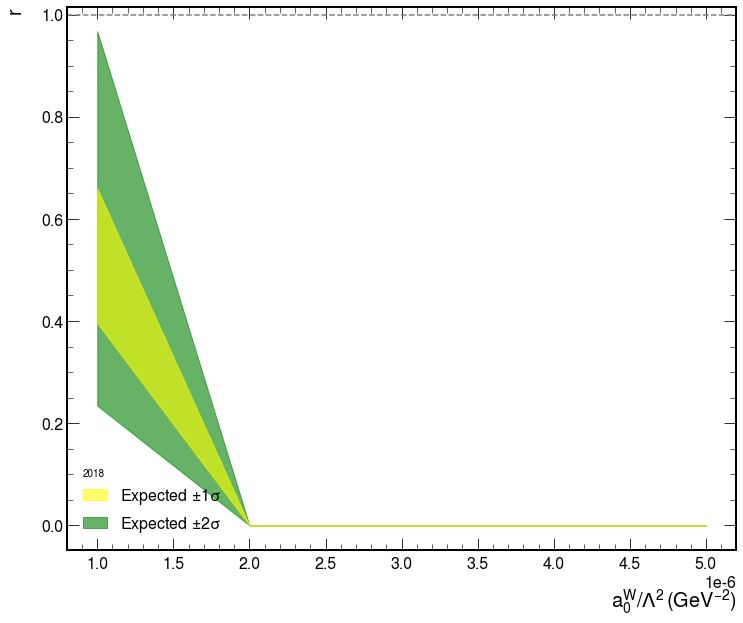

In [7]:
if "2018" in datasets:
    limits_2018 = limits[ "2018" ]
    map_couplings_2018 = map_couplings[ "2018" ]
    fig = plt.figure( figsize=(12,10) )
    plot_between_quantiles( limits_2018, map_couplings_2018, 0.025, 0.975, label="Expected {}".format( r"$\pm 2\sigma$" ) )
    plot_between_quantiles( limits_2018, map_couplings_2018, 0.160, 0.840, label="Expected {}".format( r"$\pm 1\sigma$" ) )
    if not norm_to_1fb:
        plt.axhline( y=1.0, color="gray", linestyle='--' )
    ylabel_ = ""
    if norm_to_1fb:
        ylabel_ = r"$\hat{\sigma}(\gamma\gamma \to WW)\,(\rm{fb})$"
    else:
        ylabel_ = r"$r$"
    plt.ylabel( ylabel_ )
    plt.xlabel( r"$a_0^W/\Lambda^2\,(\rm{GeV}^{-2})$" )
    if norm_to_1fb:
        import json
        samples_info_ = json.load( open( 'samples_info_UL18_XSDB.json' ) )
        
        sample_names_ = {}
        #sample_names_[ 5e-7 ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
        sample_names_[ 1e-7 ] = "FPMC_WW_bSM_13tev_a0w_1e-7_aCw_0_semi_pt0"
        sample_names_[ 2e-7 ] = "FPMC_WW_bSM_13tev_a0w_2e-7_aCw_0_semi_pt0"
        sample_names_[ 1e-6 ] = "FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0"
        sample_names_[ 2e-6 ] = "FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0"
        sample_names_[ 5e-6 ] = "FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0"
        
        #coupling_values_ = [ 5e-7, 1e-6, 2e-6, 5e-6 ]
        coupling_values_ = [ 1e-7, 2e-7, 1e-6, 2e-6, 5e-6 ]
        cross_section_values_ = []
        for coupling__ in coupling_values_:
            sample_nevents__, sample_cross_section__, sel_eff_, __ = samples_info_[ sample_names_[ coupling__ ] ]
            cross_section_values_.append( sample_cross_section__ * 1000 )
        print ( coupling_values_ )
        print ( cross_section_values_ )
        plt.plot( coupling_values_, cross_section_values_, marker='o', color='tab:red', linestyle='-.',label=r"$\sigma\,(\gamma\gamma \to WW)$" )
        
    leg_str = "2018"
    # plt.text( 0.80, 0.90, leg_str, horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes )
    handles, legend_labels = plt.gca().get_legend_handles_labels()
    order = None
    if not norm_to_1fb:
        order_ = [ 1, 0 ]
    else:
        order_ = [ 0, 2, 1 ]
    handles_new = [ handles[ idx_ ] for idx_ in order_ ]
    legend_labels_new = [ legend_labels[ idx_ ] for idx_ in order_ ]
    leg_ = plt.legend( handles_new, legend_labels_new, title=leg_str )
    leg_._legend_box.align = 'left'

    if save_figures:
        file_str_ = "expected-limits-"
        if norm_to_1fb:
            file_str_ += "cross-section-"
        file_str_ += "muon-electron-2018"
        print ( file_str_ )
        plt.savefig( "plots/{}.pdf".format( file_str_ ), bbox_inches='tight' )
        plt.savefig( "plots/{}.png".format( file_str_ ), bbox_inches='tight' )

In [8]:
if "2017_2018" in datasets:
    limits_2017_2018 = limits[ "2017_2018" ]
    map_couplings_2017_2018 = map_couplings[ "2017_2018" ]
    fig = plt.figure( figsize=(12,10) )
    plot_between_quantiles( limits_2017_2018, map_couplings_2017_2018, 0.025, 0.975, label="Expected {}".format( r"$\pm 2\sigma$" ) )
    plot_between_quantiles( limits_2017_2018, map_couplings_2017_2018, 0.160, 0.840, label="Expected {}".format( r"$\pm 1\sigma$" ) )
    plt.axhline( y=1.0, color="gray", linestyle='--' )
    plt.ylabel( r"$r$" )
    plt.xlabel( r"$a_0^W/\Lambda^2\,(\rm{GeV}^{-2})$" )
    leg_str = "2017+2018"
    # plt.text( 0.80, 0.90, leg_str, horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes )
    handles, legend_labels = plt.gca().get_legend_handles_labels()
    order_ = [ 1, 0 ]
    handles_new = [ handles[ idx_ ] for idx_ in order_ ]
    legend_labels_new = [ legend_labels[ idx_ ] for idx_ in order_ ]
    leg_ = plt.legend( handles_new, legend_labels_new, title=leg_str )
    leg_._legend_box.align = 'left'

    if save_figures:
        plt.savefig( "plots/expected-limits-muon-electron-2017_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/expected-limits-muon-electron-2017_2018.png", bbox_inches='tight' )

In [ ]:
if "2017" in datasets and "2018" in datasets and "2017_2018" in datasets:
    fig = plt.figure( figsize=(12,10) )
    plot_between_quantiles( limits_2017, map_couplings_2017, 0.025, 0.975 )
    plot_between_quantiles( limits_2017, map_couplings_2017, 0.160, 0.840 )

    plot_between_quantiles( limits_2018, map_couplings_2018, 0.025, 0.975 )
    plot_between_quantiles( limits_2018, map_couplings_2018, 0.160, 0.840 )

    plot_between_quantiles( limits_2017_2018, map_couplings_2017_2018, 0.025, 0.975, label="Expected {}".format( r"$\pm 2\sigma$" ) )
    plot_between_quantiles( limits_2017_2018, map_couplings_2017_2018, 0.160, 0.840, label="Expected {}".format( r"$\pm 1\sigma$" ) )

    plt.axhline( y=1.0, color="gray", linestyle='--' )
    plt.ylabel( r"$r$" )
    plt.xlabel( r"$a_0^W/\Lambda^2\,(\rm{GeV}^{-2})$" )

    leg_str = "2017 vs 2018 vs 2017+2018"
    # plt.text( 0.50, 0.90, leg_str, horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes )
    handles, legend_labels = plt.gca().get_legend_handles_labels()
    order_ = [ 1, 0 ]
    handles_new = [ handles[ idx_ ] for idx_ in order_ ]
    legend_labels_new = [ legend_labels[ idx_ ] for idx_ in order_ ]
    leg_ = plt.legend( handles_new, legend_labels_new, title=leg_str )
    leg_._legend_box.align = 'left'

    if save_figures:
        plt.savefig( "plots/expected-limits-muon-electron-2017_vs_2018_vs_2017_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/expected-limits-muon-electron-2017_vs_2018_vs_2017_2018.png", bbox_inches='tight' )